# 🌍 COVID-19 Global Data Analysis Dashboard

This project analyzes global COVID-19 trends using the **latest country-wise dataset** from Kaggle.  
We explore:

- 🌐 Top 10 affected countries
- ⚰️ Case Fatality Rates (CFR)
- ✅ Recovery Rates
- 📊 Data visualized with Matplotlib & Seaborn

---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-whitegrid')


## 📂 Step 1: Upload and Load the Dataset

We use the `country_wise_latest.csv` file from Kaggle (COVID-19 dataset).


In [2]:
from google.colab import files
uploaded = files.upload()

Saving country_wise_latest.csv to country_wise_latest.csv


In [3]:
df = pd.read_csv("country_wise_latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


## 🧹 Step 2: Clean & Filter Important Columns
We'll keep only the relevant columns: Confirmed, Deaths, Recovered, Active.


In [4]:
df = df[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']].dropna()
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667


## 🌐 Step 3: Top 10 Countries by Confirmed Cases
Visualizing countries with the highest total confirmed cases.


/tmp/ipython-input-5-3505350124.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_confirmed['Confirmed'], y=top_confirmed['Country/Region'], palette='Reds_r')


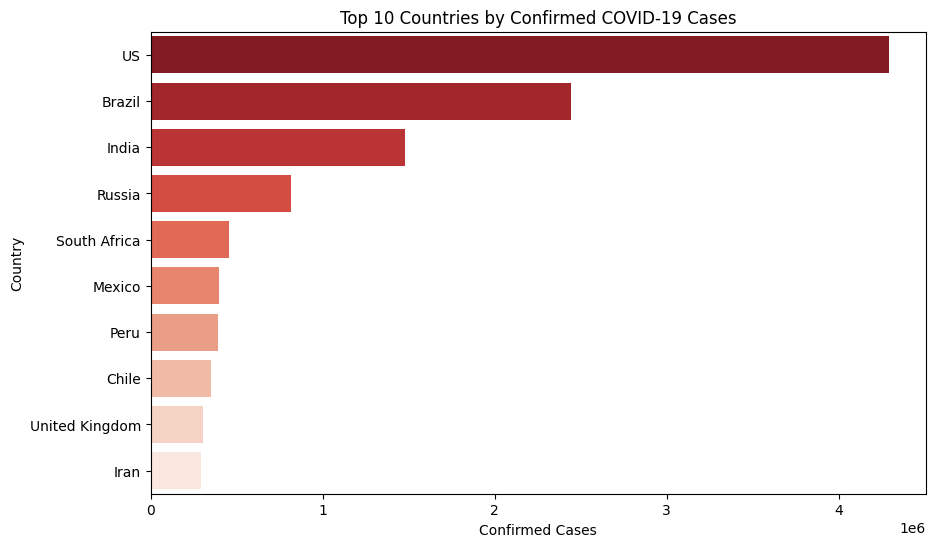

In [5]:
top_confirmed = df.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_confirmed['Confirmed'], y=top_confirmed['Country/Region'], palette='Reds_r')
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.show()


## ⚰️ Step 4: Case Fatality Rate (CFR)
CFR is calculated as:  
**CFR = (Deaths / Confirmed Cases) × 100**


/tmp/ipython-input-6-1471007949.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cfr['CFR'], y=top_cfr['Country/Region'], palette='magma')


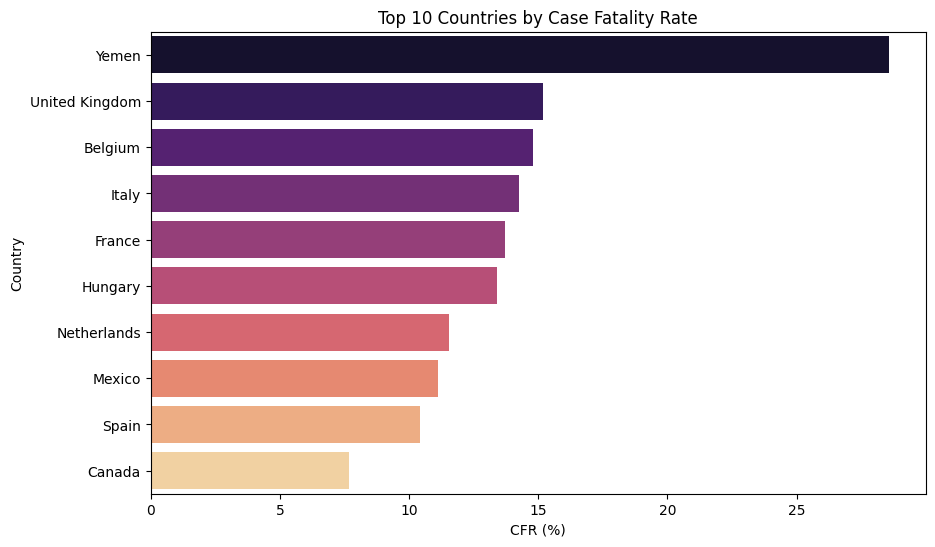

In [6]:
df['CFR'] = (df['Deaths'] / df['Confirmed']) * 100
top_cfr = df[df['Confirmed'] > 1000].sort_values('CFR', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cfr['CFR'], y=top_cfr['Country/Region'], palette='magma')
plt.title("Top 10 Countries by Case Fatality Rate")
plt.xlabel("CFR (%)")
plt.ylabel("Country")
plt.show()

## ✅ Step 5: Recovery Rate by Country
Calculated as:  
**Recovery Rate = (Recovered / Confirmed Cases) × 100**


/tmp/ipython-input-7-2755948620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_recovery['RecoveryRate'], y=top_recovery['Country/Region'], palette='Greens')


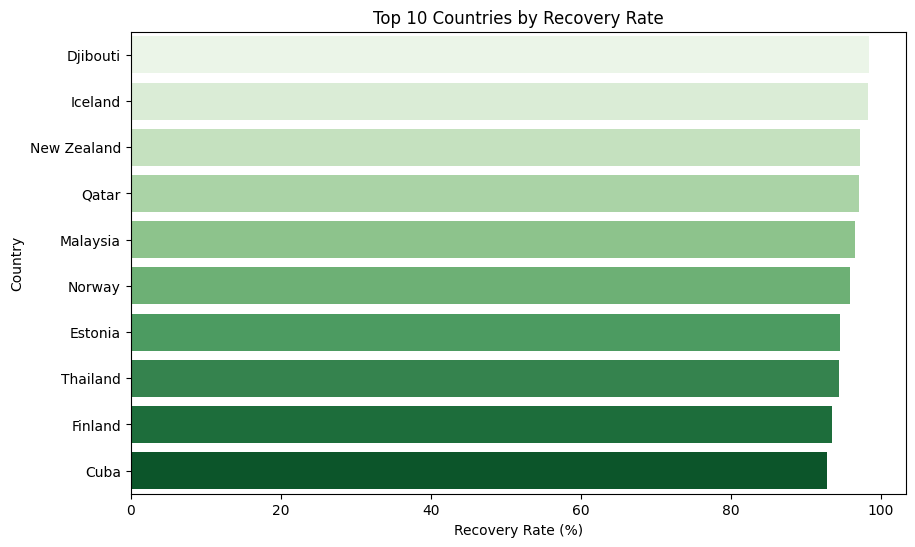

In [7]:
df['RecoveryRate'] = (df['Recovered'] / df['Confirmed']) * 100
top_recovery = df[df['Confirmed'] > 1000].sort_values('RecoveryRate', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_recovery['RecoveryRate'], y=top_recovery['Country/Region'], palette='Greens')
plt.title("Top 10 Countries by Recovery Rate")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Country")
plt.show()

## 📈 Conclusion

This dashboard gave a quick overview of the **COVID-19 global situation**, based on the latest confirmed, recovered, and death figures by country.

We visualized:
- Top 10 most affected countries
- Countries with the highest CFR
- Recovery rate leaders

📊 Built using Python, Pandas, and Seaborn in Google Colab.
